In [0]:
import pandas as pd
dfstress_u10 = pd.read_json('/content/drive/My Drive/Colab Notebooks/Stress/Stress_u10.json')
dfstress_u10 = dfstress_u10.drop(columns=['null', 'location'])
dfstress_u10 = dfstress_u10.dropna()
dfstress_u16 = pd.read_json('/content/drive/My Drive/Colab Notebooks/Stress/Stress_u16.json')
dfstress_u16 = dfstress_u16.drop(columns=['null','location'])
dfstress_u16 = dfstress_u16.dropna()



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dfactivity_u10 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/activity/activity_u10.csv')
dfactivity_u10['date'] = pd.to_datetime(dfactivity_u10['timestamp'], unit='s')
dfactivity_u10.rename(columns=lambda x: x[1:4], inplace=True)

dfactivity_u16 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/activity/activity_u16.csv')
dfactivity_u16['date'] = pd.to_datetime(dfactivity_u16['timestamp'], unit='s')
dfactivity_u16.rename(columns=lambda x: x[1:4], inplace=True)

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')
%load_ext google.colab.data_table

Authenticated


In [0]:
project_id = 'ipbdscw'
%env GCLOUD_PROJECT = ipads8

env: GCLOUD_PROJECT=ipads8


In [0]:
start = time.time()
dfstress_u10.to_gbq('dataset.stressu10', project_id)
end=time.time()
print("\n\n time alternative 1 "+ str(end-start))

TableCreationError: ignored

In [0]:
start = time.time()
dfstress_u16.to_gbq('dataset.stressu16', project_id)
end=time.time()
print("\n\n time alternative 1 "+ str(end-start))

TableCreationError: ignored

In [0]:
start = time.time()
dfactivity_u16.to_gbq('dataset.activityu16', project_id)
end=time.time()
print("\n\n time alternative 1 "+ str(end-start))

TableCreationError: ignored

In [0]:
import pandas

sql = """
    WITH Tablest AS
(Select Min(CAST(ate as Date)) as Datum,AVG(act) as activity from dataset.activityu16 group by Cast(ate as Date) order by Datum),
days AS (
  SELECT day
  FROM (
    SELECT 
      MIN(DATE(TIMESTAMP(Datum))) min_dt, 
      MAX(DATE(TIMESTAMP(Datum))) max_dt
    FROM Tablest
  ), UNNEST(GENERATE_DATE_ARRAY(min_dt, max_dt)) day
)
SELECT day, 
  LAST_VALUE(activity IGNORE NULLS) OVER(ORDER BY day) activity
FROM days
LEFT JOIN Tablest
ON day = DATE(TIMESTAMP(Datum)) order by day
"""


# Run a Standard SQL query with the project set explicitly
dfbigactivityu16 = pandas.read_gbq(sql, project_id=project_id, dialect='standard')
dfbigactivityu16.columns =['ds','y']
dfbigactivityu16['ds'] = dfbigactivityu16['ds'].dt.date
dfbigactivityu16

,ds,y
0,2013-03-27,0.127005
1,2013-03-28,0.094604
2,2013-03-29,0.167165
3,2013-03-30,0.152588
4,2013-03-31,0.073345
...,...,...
59,2013-05-25,0.086284
60,2013-05-26,0.421204
61,2013-05-27,0.088085
62,2013-05-28,0.038113


In [0]:
sql = """
    WITH Tablest AS
(Select Min(CAST(ate as Date)) as Datum,AVG(act) as activity from dataset.activityu10 group by Cast(ate as Date) order by Datum),
days AS (
  SELECT day
  FROM (
    SELECT 
      MIN(DATE(TIMESTAMP(Datum))) min_dt, 
      MAX(DATE(TIMESTAMP(Datum))) max_dt
    FROM Tablest
  ), UNNEST(GENERATE_DATE_ARRAY(min_dt, max_dt)) day
)
SELECT day, 
  LAST_VALUE(activity IGNORE NULLS) OVER(ORDER BY day) activity
FROM days
LEFT JOIN Tablest
ON day = DATE(TIMESTAMP(Datum)) order by day
"""


# Run a Standard SQL query with the project set explicitly
dfbigactivityu10 = pandas.read_gbq(sql, project_id=project_id, dialect='standard')
dfbigactivityu10.columns =['ds','y']
dfbigactivityu10['ds'] = dfbigactivityu10['ds'].dt.date
dfbigactivityu10

,ds,y
0,2013-03-27,0.061805
1,2013-03-28,0.047850
2,2013-03-29,0.074549
3,2013-03-30,0.049537
4,2013-03-31,0.052046
...,...,...
62,2013-05-28,0.103993
63,2013-05-29,0.118293
64,2013-05-30,0.062997
65,2013-05-31,0.088163


In [0]:
sql = """
WITH Tablest AS
(Select Min(CAST(resp_time as Date)) as Datum,AVG(level) as level from dataset.stressu10 group by Cast(resp_time as Date) order by Datum),
days AS (
  SELECT day
  FROM (
    SELECT 
      MIN(DATE(TIMESTAMP(Datum))) min_dt, 
      MAX(DATE(TIMESTAMP(Datum))) max_dt
    FROM Tablest
  ), UNNEST(GENERATE_DATE_ARRAY(min_dt, max_dt)) day
)
SELECT day, 
  LAST_VALUE(level IGNORE NULLS) OVER(ORDER BY day) level
FROM days
LEFT JOIN Tablest
ON day = DATE(TIMESTAMP(Datum)) order by day
"""

dfbigstressu10 = pandas.read_gbq(sql, project_id, dialect='standard')
dfbigstressu10.columns =['ds','y']
dfbigstressu10['ds'] = dfbigstressu10['ds'].dt.date
dfbigstressu10

,ds,y
0,2013-03-28,2.000000
1,2013-03-29,2.000000
2,2013-03-30,2.000000
3,2013-03-31,2.800000
4,2013-04-01,2.500000
5,2013-04-02,2.500000
6,2013-04-03,3.500000
7,2013-04-04,1.750000
8,2013-04-05,1.250000
9,2013-04-06,3.500000


In [0]:
sql = """
WITH Tablest AS
(Select Min(CAST(resp_time as Date)) as Datum,AVG(level) as level from dataset.stressu16 group by Cast(resp_time as Date) order by Datum),
days AS (
  SELECT day
  FROM (
    SELECT 
      MIN(DATE(TIMESTAMP(Datum))) min_dt, 
      MAX(DATE(TIMESTAMP(Datum))) max_dt
    FROM Tablest
  ), UNNEST(GENERATE_DATE_ARRAY(min_dt, max_dt)) day
)
SELECT day, 
  LAST_VALUE(level IGNORE NULLS) OVER(ORDER BY day) level
FROM days
LEFT JOIN Tablest
ON day = DATE(TIMESTAMP(Datum)) order by day
"""

dfbigstressu16 = pandas.read_gbq(sql, project_id, dialect='standard')
dfbigstressu16.columns =['ds','y']
dfbigstressu16['ds'] = dfbigstressu16['ds'].dt.date
dfbigstressu16

,ds,y
0,2013-03-27,1.0
1,2013-03-28,1.0
2,2013-03-29,1.0
3,2013-03-30,1.0
4,2013-03-31,4.0
...,...,...
58,2013-05-24,1.5
59,2013-05-25,1.5
60,2013-05-26,1.5
61,2013-05-27,1.5


In [0]:
# Python
import pandas as pd
from fbprophet import Prophet

# Python
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
   <script src="/static/components/requirejs/require.js"></script>
   <script>
      requirejs.config({
          paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
          },
      });
      </script>
      '''))


from fbprophet.plot import plot_plotly

configure_plotly_browser_state()


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


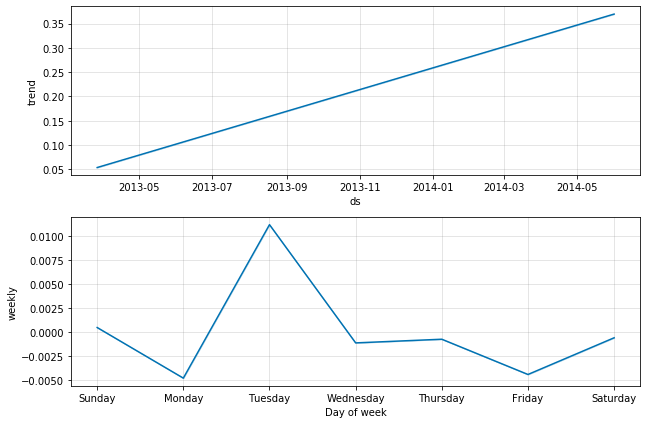

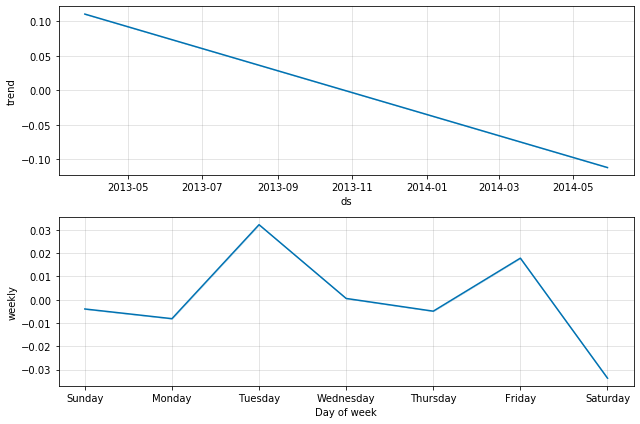

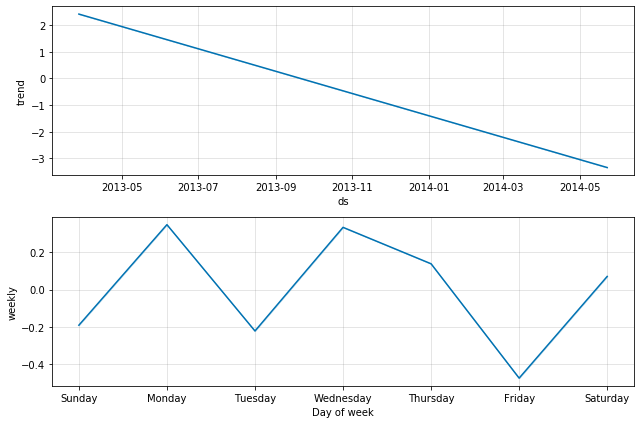

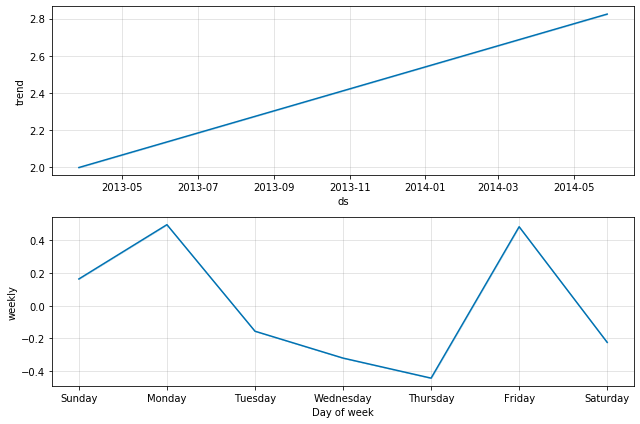

In [0]:
mactivityu10 = Prophet(interval_width=0.5)
mactivityu16 = Prophet(interval_width=0.5)
mstressu10 = Prophet(interval_width=0.5)
mstressu16 = Prophet(interval_width=0.5)

mactivityu10.fit(dfbigactivityu10)
mactivityu16.fit(dfbigactivityu16)

mstressu10.fit(dfbigstressu10)
mstressu16.fit(dfbigstressu16)

factivityu16 = mactivityu16.make_future_dataframe(periods=365)
factivityu10 = mactivityu10.make_future_dataframe(periods=365)

fstressu10 = mstressu10.make_future_dataframe(periods=365)
fstressu16 = mstressu16.make_future_dataframe(periods=365)

forecastactu10 = mactivityu10.predict(factivityu10)
forecastactu16 = mactivityu16.predict(factivityu16)

forecaststru10 = mstressu10.predict(fstressu10)
forecaststru16 = mstressu16.predict(fstressu16)

compactu10 = mactivityu10.plot_components(forecastactu10)
compactu16 = mactivityu16.plot_components(forecastactu16)

compstru10 = mstressu10.plot_components(forecaststru10)
compstru16 = mstressu16.plot_components(forecaststru16)


In [0]:
#Pearson-Correlation
from scipy.stats import pearsonr
corr, p_value = pearsonr(dfbigactivityu10['y'][1:58], dfbigstressu10['y'])
print('Pearson Correlation between Stress and Activity for Student u10:', corr)


corr, p_value = pearsonr(dfbigactivityu16['y'][1:58], dfbigstressu16['y'][1:58])
print('Pearson Correlation between Stress and Activity for Student u16:', corr)

Pearson Correlation between Stress and Activity for Student u10: -0.08182675754725735
Pearson Correlation between Stress and Activity for Student u16: -0.14934242758236216


In [0]:
mactivityu10.predict_seasonal_components(forecastactu10)

,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper
0,-0.001123,-0.001123,-0.001123,-0.001123,-0.001123,-0.001123,0.0,0.0,0.0
1,-0.000741,-0.000741,-0.000741,-0.000741,-0.000741,-0.000741,0.0,0.0,0.0
2,-0.004407,-0.004407,-0.004407,-0.004407,-0.004407,-0.004407,0.0,0.0,0.0
3,-0.000591,-0.000591,-0.000591,-0.000591,-0.000591,-0.000591,0.0,0.0,0.0
4,0.000477,0.000477,0.000477,0.000477,0.000477,0.000477,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
427,-0.001123,-0.001123,-0.001123,-0.001123,-0.001123,-0.001123,0.0,0.0,0.0
428,-0.000741,-0.000741,-0.000741,-0.000741,-0.000741,-0.000741,0.0,0.0,0.0
429,-0.004407,-0.004407,-0.004407,-0.004407,-0.004407,-0.004407,0.0,0.0,0.0
430,-0.000591,-0.000591,-0.000591,-0.000591,-0.000591,-0.000591,0.0,0.0,0.0


In [0]:
dfconversationsu10 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/conversation_u10.csv')
dfconversationsu10['start_date'] = pd.to_datetime(dfconversationsu10['start_timestamp'], unit='s')
dfconversationsu10['end_date'] = pd.to_datetime(dfconversationsu10[' end_timestamp'], unit='s')
dfconversationsu10['dates'] = dfconversationsu10['start_date'].dt.date
dfconversationsu10['timestart'] = dfconversationsu10['start_date'].dt.time
dfconversationsu10['timeend'] = dfconversationsu10['end_date'].dt.time
dfconversationsu10['duration'] = dfconversationsu10['end_date']-dfconversationsu10['start_date']

#Frequency of Conversations
frequ10 = dfconversationsu10['start_date'].groupby(dfconversationsu10['dates']).count()

dfconversationsu16 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/conversation_u16.csv')
dfconversationsu16['start_date'] = pd.to_datetime(dfconversationsu16['start_timestamp'], unit='s')
dfconversationsu16['end_date'] = pd.to_datetime(dfconversationsu16[' end_timestamp'], unit='s')
dfconversationsu16['dates'] = dfconversationsu16['start_date'].dt.date
dfconversationsu16['timestart'] = dfconversationsu16['start_date'].dt.time
dfconversationsu16['timeend'] = dfconversationsu16['end_date'].dt.time
dfconversationsu16['duration'] = dfconversationsu16['end_date']-dfconversationsu16['start_date']

frequ16 = dfconversationsu16['start_date'].groupby(dfconversationsu16['dates']).count()


In [0]:
dfconversationsu16.head()

,start_timestamp,end_timestamp,start_date,end_date,dates,timestart,timeend,duration
0,1364386888,1364387109,2013-03-27 12:21:28,2013-03-27 12:25:09,2013-03-27,12:21:28,12:25:09,00:03:41
1,1364387841,1364387962,2013-03-27 12:37:21,2013-03-27 12:39:22,2013-03-27,12:37:21,12:39:22,00:02:01
2,1364389416,1364389476,2013-03-27 13:03:36,2013-03-27 13:04:36,2013-03-27,13:03:36,13:04:36,00:01:00
3,1364389967,1364390956,2013-03-27 13:12:47,2013-03-27 13:29:16,2013-03-27,13:12:47,13:29:16,00:16:29
4,1364392640,1364393518,2013-03-27 13:57:20,2013-03-27 14:11:58,2013-03-27,13:57:20,14:11:58,00:14:38


In [0]:
frequ10

dates
2013-03-27    37
2013-03-28    36
2013-03-29    41
2013-03-30    20
2013-03-31    18
              ..
2013-05-27    18
2013-05-28    45
2013-05-29    44
2013-05-30    32
2013-05-31    14
Name: start_date, Length: 66, dtype: int64

In [0]:
frequ10 = pd.DataFrame(frequ10)
frequ10.reset_index(level = 0, inplace=True)
frequ10.columns = ['ds','y']
frequ10


,ds,y
0,2013-03-27,37
1,2013-03-28,36
2,2013-03-29,41
3,2013-03-30,20
4,2013-03-31,18
...,...,...
61,2013-05-27,18
62,2013-05-28,45
63,2013-05-29,44
64,2013-05-30,32


In [0]:
frequ16 = pd.DataFrame(frequ16)
frequ16.reset_index(level = 0, inplace=True)
frequ16.columns = ['ds','y']
frequ16

,ds,y
0,2013-03-27,29
1,2013-03-28,28
2,2013-03-29,31
3,2013-03-30,51
4,2013-03-31,35
5,2013-04-01,32
6,2013-04-02,41
7,2013-04-03,21
8,2013-04-04,36
9,2013-04-05,28


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


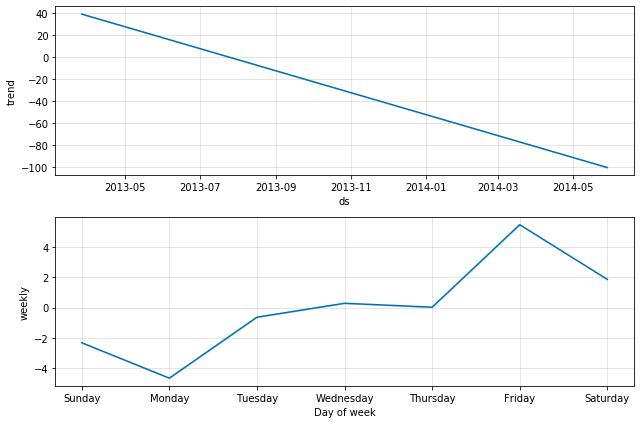

In [0]:
mdurationu10 = Prophet(interval_width=0.5)
mdurationu16 = Prophet(interval_width=0.5)
mstressu10 = Prophet(interval_width=0.5)
mstressu16 = Prophet(interval_width=0.5)

mdurationu10.fit(frequ10)
mdurationu16.fit(frequ16)

fdurationu16 = mdurationu16.make_future_dataframe(periods=365)
fdurationu10 = mdurationu10.make_future_dataframe(periods=365)

forecastdurationu10 = mdurationu10.predict(fdurationu10)
forecastdurationu16 = mdurationu16.predict(fdurationu16)

compactu10 = mdurationu10.plot_components(forecastdurationu10)
compactu16 = mdurationu16.plot_components(forecastdurationu16)


In [0]:
#Pearson-Correlation

corr, p_value = pearsonr(frequ10['y'][1:58], dfbigstressu10['y'])
#print(len(dfbigactivityu10['y'][1:58]), len(dfbigstressu10['y']))
print('Pearson Correlation between Stress and Conversation Frequency for Student u10:',corr)
#dfbigstressu10

corr, p_value = pearsonr(frequ16['y'][1:len(frequ16)], dfbigstressu10['y'])
#print(len(dfbigactivityu10['y'][1:58]), len(dfbigstressu10['y']))
print('Pearson Correlation between Stress and Conversation Frequency for Student u16:', corr)

Pearson Correlation between Stress and Conversation Frequency for Student u10: -0.08925092384390038
Pearson Correlation between Stress and Conversation Frequency for Student u16: -0.010866213213246457


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [0]:
datau10 = {}
datau10['activity'] = dfbigactivityu10['y'][1:58]
datau10['frequency'] = frequ10['y'][1:58]
datau10['stress'] = dfbigstressu10['y'][1:58]
datau10['date'] = dfbigstressu10['ds']
datau10 = pd.DataFrame(datau10)
datau10 = datau10.dropna()
datau10

,activity,frequency,stress,date
1,0.047850,36.0,2.000000,2013-03-29
2,0.074549,41.0,2.000000,2013-03-30
3,0.049537,20.0,2.800000,2013-03-31
4,0.052046,18.0,2.500000,2013-04-01
5,0.050755,34.0,2.500000,2013-04-02
6,0.043462,49.0,3.500000,2013-04-03
7,0.047509,32.0,1.750000,2013-04-04
8,0.061647,37.0,1.250000,2013-04-05
9,0.052331,51.0,3.500000,2013-04-06
10,0.061311,39.0,2.000000,2013-04-07


In [0]:
feature_cols = ['activity','frequency']

In [0]:
X = datau10[feature_cols]
y = datau10.stress

In [0]:
from sklearn import preprocessing
from sklearn import utils

In [0]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(datau10.stress)

In [0]:
rounded = datau10.stress.round()

In [0]:
encoded

array([ 6,  6,  9,  7,  7, 11,  4,  1, 11,  6, 11,  8,  7,  5,  7,  0,  0,
        2,  0,  3,  7,  7,  7, 12, 12,  3,  7,  7,  2, 12,  0, 11,  7,  7,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 10,  0,  6,
        6,  6,  6,  6, 12])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

0.11764705882352941


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, rounded, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
score = clf.score(X_test, y_test)
print(score)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

0.23529411764705882
